# Analysis 
___
###  Predictors for success : a case study to explore and chart factors that boost chances of a candidates success. 
___


In [103]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
import warnings
warnings.filterwarnings("ignore")

In [105]:
data_path = "../data/elections_data_all.csv"
df = pd.read_csv(data_path)
df.reset_index(inplace=True)

# were using the following comparators: 
# 1. Gender 
# 2. Caste
# 3. Terms
# 4. Number of contests 
# 5. Education Level
# 6. Same constituency / party
# 7. Incumbent 
# 8. Turncoat


# parings: sex and caste and education level, terms and number of contests, Same constituency, same party and incumbency 


# and this is how success is measured
# 1. Vote Share Percentage
# 2. Margin of Victory
# 3. Position


In [106]:
#1: gender and caste, and gender stacked chart and a bar plot of the education levels

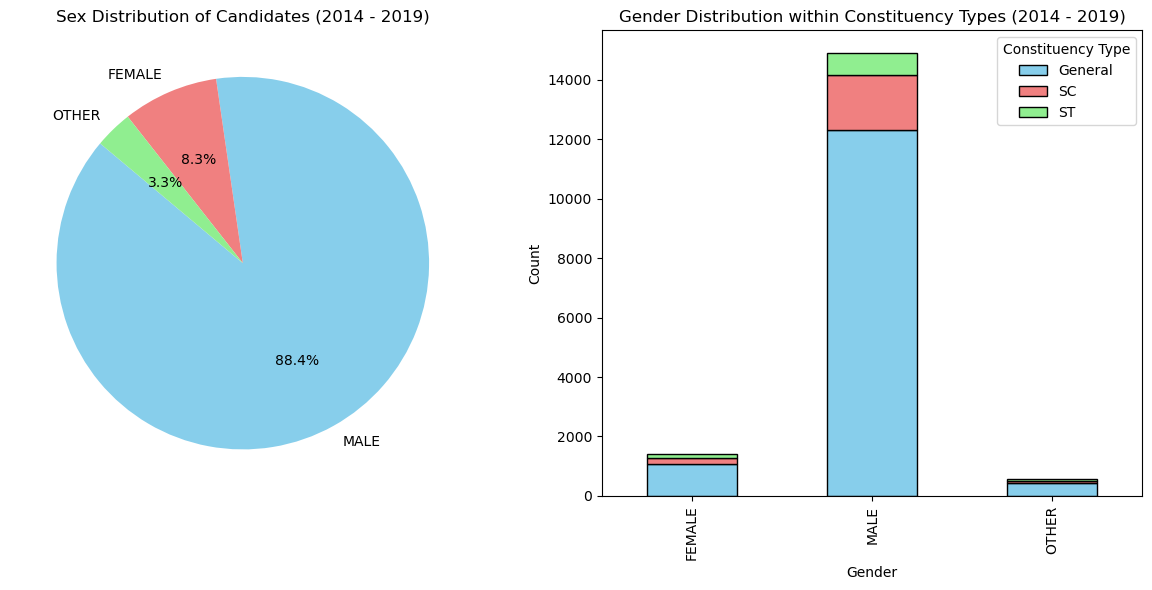

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a Pandas DataFrame called 'df'

# Filter the data for candidates in 2014 and 2019
filtered_df = df[(df['Year'] == 2014) | (df['Year'] == 2019)]

# Data Cleaning: Standardize the 'Sex' column values to 'MALE', 'FEMALE', or 'OTHER'
sex_mapping = {
    'M': 'MALE',
    'm': 'MALE',
    'Male': 'MALE',
    'F': 'FEMALE',
    'f': 'FEMALE',
    'Female': 'FEMALE',
    'O': 'OTHER',  # Assuming 'O' represents 'OTHER'
    'Nota': 'OTHER',  # Assuming 'Nota' represents 'OTHER'
    'NOTA': 'OTHER'  # Assuming 'NOTA' represents 'OTHER'
}

filtered_df['Sex'] = filtered_df['Sex'].replace(sex_mapping)

# Get the sex distribution
sex_distribution = filtered_df['Sex'].value_counts()

# Create horizontally stacked subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie Chart: Sex Distribution
ax1.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
ax1.set_title('Sex Distribution of Candidates (2014 - 2019)')

# Caste Distribution within Gender: Stacked Bar Chart
cross_tab = pd.crosstab(filtered_df['Sex'], filtered_df['Constituency_Type'])
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black', ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')
ax2.set_title('Gender Distribution within Constituency Types (2014 - 2019)')
ax2.legend(title='Constituency Type', loc='upper right', labels=['General', 'SC', 'ST'])

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


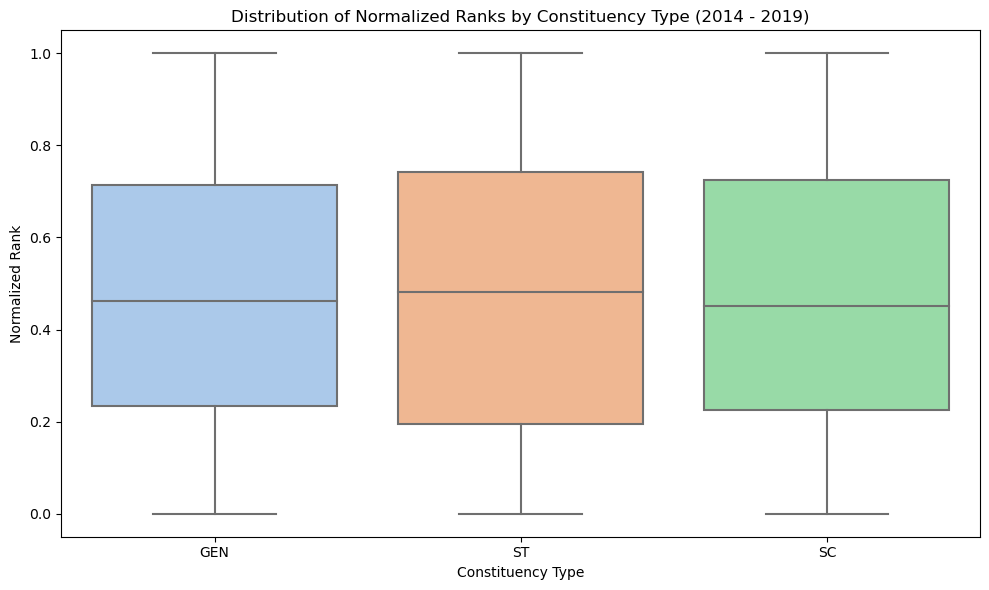

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a Pandas DataFrame called 'df'

# Filter the data for candidates in 2014 and 2019
filtered_df = df[(df['Year'] == 2014) | (df['Year'] == 2019)]

# Data Cleaning: Standardize the 'Sex' column values to 'MALE', 'FEMALE', or 'OTHER'
sex_mapping = {
    'M': 'MALE',
    'm': 'MALE',
    'Male': 'MALE',
    'F': 'FEMALE',
    'f': 'FEMALE',
    'Female': 'FEMALE',
    'O': 'OTHER',  # Assuming 'O' represents 'OTHER'
    'Nota': 'OTHER',  # Assuming 'Nota' represents 'OTHER'
    'NOTA': 'OTHER'  # Assuming 'NOTA' represents 'OTHER'
}

filtered_df['Sex'] = filtered_df['Sex'].replace(sex_mapping)

# Using 'Position' as the measure of success, you can replace it with any other column as needed
success_measure = 'Position'

# Normalize the ranks within each constituency type (Percentile Rank Normalization)
filtered_df['Normalized_Rank'] = filtered_df.groupby('Constituency_Type')[success_measure].apply(lambda x: (x.rank(method='min') - 1) / (len(x) - 1))

# Create box plots to visualize the distribution of normalized ranks by Constituency_Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Constituency_Type', y='Normalized_Rank', palette='pastel')
plt.xlabel('Constituency Type')
plt.ylabel('Normalized Rank')
plt.title(f'Distribution of Normalized Ranks by Constituency Type (2014 - 2019)')

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


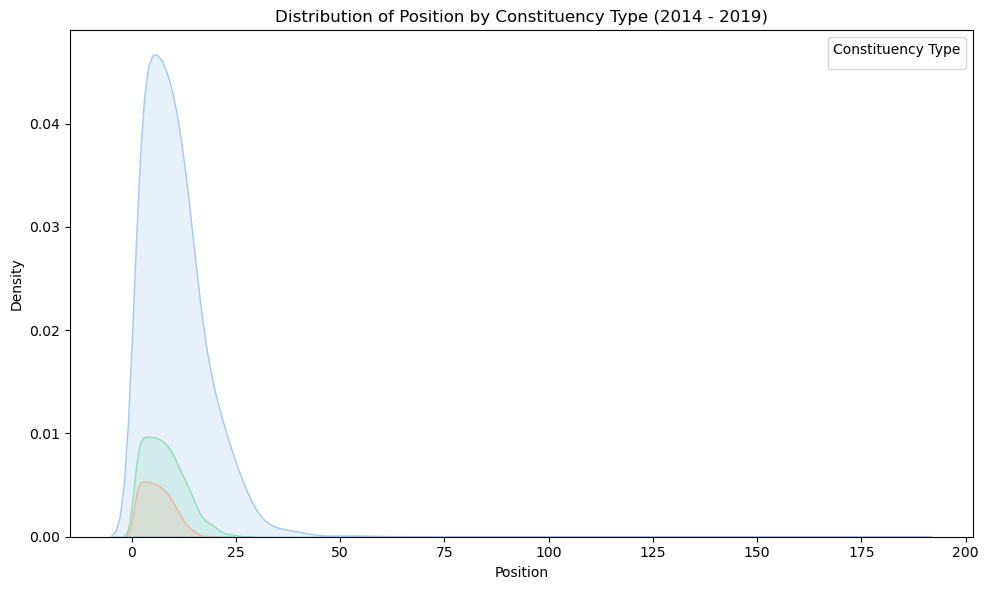

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a Pandas DataFrame called 'df'

# Filter the data for candidates in 2014 and 2019
filtered_df = df[(df['Year'] == 2014) | (df['Year'] == 2019)]

# Data Cleaning: Standardize the 'Sex' column values to 'MALE', 'FEMALE', or 'OTHER'
sex_mapping = {
    'M': 'MALE',
    'm': 'MALE',
    'Male': 'MALE',
    'F': 'FEMALE',
    'f': 'FEMALE',
    'Female': 'FEMALE',
    'O': 'OTHER',  # Assuming 'O' represents 'OTHER'
    'Nota': 'OTHER',  # Assuming 'Nota' represents 'OTHER'
    'NOTA': 'OTHER'  # Assuming 'NOTA' represents 'OTHER'
}

filtered_df['Sex'] = filtered_df['Sex'].replace(sex_mapping)

# Using 'Position' as the measure of success, you can replace it with any other column as needed
success_measure = 'Position'

# Create a KDE plot to visualize the distribution of positions by Constituency_Type
plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_df, x=success_measure, hue='Constituency_Type', fill=True, palette='pastel')
plt.xlabel(success_measure)
plt.ylabel('Density')
plt.title(f'Distribution of {success_measure} by Constituency Type (2014 - 2019)')
plt.legend(title='Constituency Type', loc='upper right')

plt.tight_layout()
plt.show()


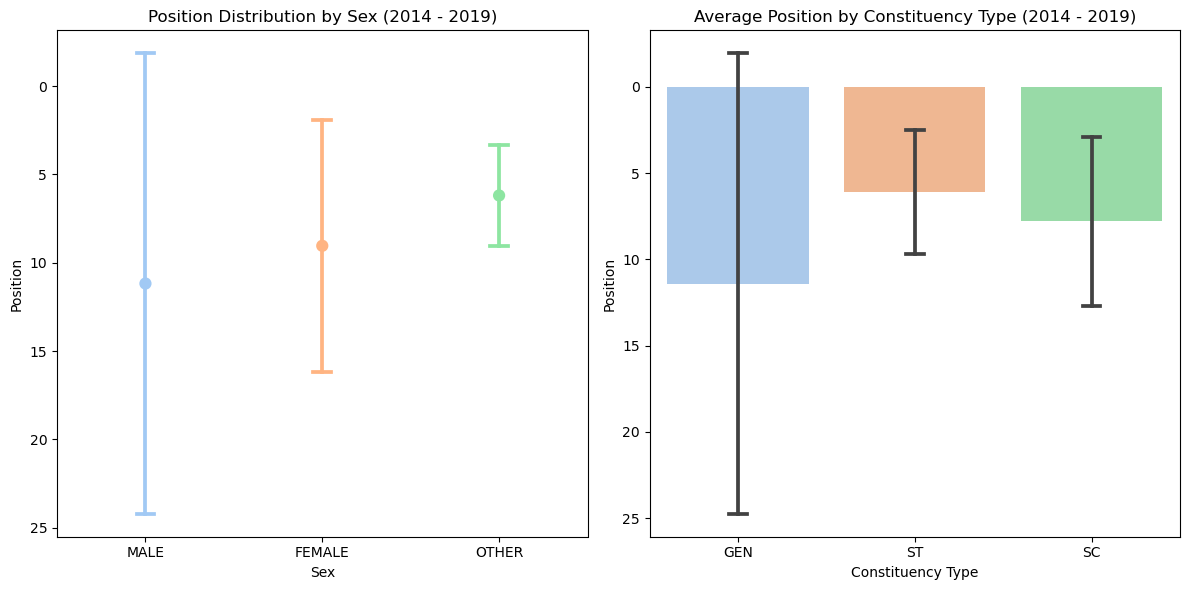

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a Pandas DataFrame called 'df'

# Filter the data for candidates in 2014 and 2019
filtered_df = df[(df['Year'] == 2014) | (df['Year'] == 2019)]

# Data Cleaning: Standardize the 'Sex' column values to 'MALE', 'FEMALE', or 'OTHER'
sex_mapping = {
    'M': 'MALE',
    'm': 'MALE',
    'Male': 'MALE',
    'F': 'FEMALE',
    'f': 'FEMALE',
    'Female': 'FEMALE',
    'O': 'OTHER',  # Assuming 'O' represents 'OTHER'
    'Nota': 'OTHER',  # Assuming 'Nota' represents 'OTHER'
    'NOTA': 'OTHER'  # Assuming 'NOTA' represents 'OTHER'
}

filtered_df['Sex'] = filtered_df['Sex'].replace(sex_mapping)

# Using 'Position' as the measure of success, you can replace it with any other column as needed
success_measure = 'Position'

# Create a point plot to visualize the distribution of positions with regard to sex
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.pointplot(data=filtered_df, x='Sex', y=success_measure, ci='sd', palette='pastel', capsize=0.1)
plt.xlabel('Sex')
plt.ylabel(success_measure)
plt.title(f'Position Distribution by Sex (2014 - 2019)')
ax = plt.gca()
ax.invert_yaxis()

# Create a bar plot to visualize the average position by Constituency_Type
plt.subplot(1, 2, 2)
sns.barplot(data=filtered_df, x='Constituency_Type', y=success_measure, ci='sd', palette='pastel', capsize=0.1)
plt.xlabel('Constituency Type')
plt.ylabel(success_measure)
plt.title(f'Average Position by Constituency Type (2014 - 2019)')
ax = plt.gca()
ax.invert_yaxis()

plt.tight_layout()
plt.show()